In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
import tensorflow as tf
from tensorflow.python.data import Dataset

In [0]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [0]:
#get the data
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [5]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9615,-119.4,36.6,25.0,1784.0,312.0,904.0,303.0,3.6,107.6
4338,-118.0,34.6,38.0,248.0,55.0,261.0,53.0,2.1,96.9
8933,-118.9,35.6,33.0,1504.0,325.0,584.0,223.0,3.5,94.6
13047,-121.9,38.0,31.0,3644.0,746.0,2229.0,678.0,3.1,117.8
16697,-122.8,38.4,32.0,1437.0,257.0,752.0,245.0,4.7,240.9
...,...,...,...,...,...,...,...,...,...
2738,-117.7,33.5,4.0,2142.0,625.0,1176.0,483.0,3.4,325.0
4400,-118.0,34.1,44.0,1446.0,250.0,721.0,243.0,4.7,352.2
8951,-118.9,34.3,28.0,1545.0,371.0,1334.0,318.0,3.4,194.1
7068,-118.3,34.1,34.0,1478.0,675.0,1976.0,653.0,2.1,225.0


In [0]:
df = california_housing_dataframe.iloc[:,2:]

In [16]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [0]:
#simple model i.e total rooms vs house valua

# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]
# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [0]:
# Define the label.
targets = california_housing_dataframe["median_house_value"]
# Configure a numeric feature column for house value.
target_columns = [tf.feature_column.numeric_column("median_house_value")]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
my_feature =  np.array(my_feature)
targets = np.array(targets)
X_train, X_test, y_train, y_test = train_test_split(my_feature, targets, test_size=0.20, random_state=42)

In [91]:
X_train

array([[6890.],
       [3798.],
       [ 454.],
       ...,
       [6160.],
       [1552.],
       [4412.]])

In [93]:
y_train

array([ 95.9  , 500.001, 187.5  , ..., 205.   , 128.4  , 213.1  ])

In [0]:
from sklearn import linear_model, metrics


In [0]:
#simple linear regression from sklearn
regression = linear_model.LinearRegression()

In [115]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = y_pred = regression.predict(X_test)

In [120]:
y_pred

array([212.25282876, 209.73189483, 208.43929132, ..., 206.76104919,
       232.24176376, 222.72220308])

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 91.10764053561108
MSE: 13190.124699026119
RMSE: 114.84826815858443


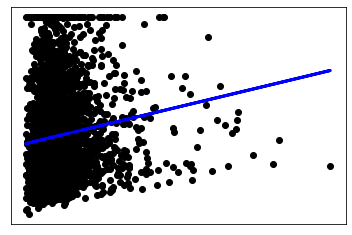

In [125]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

So the analysis is wrong use all the features insted 1


In [126]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9615,25.0,1784.0,312.0,904.0,303.0,3.6,107.6
4338,38.0,248.0,55.0,261.0,53.0,2.1,96.9
8933,33.0,1504.0,325.0,584.0,223.0,3.5,94.6
13047,31.0,3644.0,746.0,2229.0,678.0,3.1,117.8
16697,32.0,1437.0,257.0,752.0,245.0,4.7,240.9
...,...,...,...,...,...,...,...
2738,4.0,2142.0,625.0,1176.0,483.0,3.4,325.0
4400,44.0,1446.0,250.0,721.0,243.0,4.7,352.2
8951,28.0,1545.0,371.0,1334.0,318.0,3.4,194.1
7068,34.0,1478.0,675.0,1976.0,653.0,2.1,225.0


In [0]:
features = df.iloc[:,:-1]

In [0]:
labels = df.iloc[:,-1:]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

In [136]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
predictions = y_pred = regression.predict(X_test)
predictions

array([[228.94614679],
       [276.13625703],
       [136.64043875],
       ...,
       [212.46058352],
       [221.03276875],
       [533.99608201]])

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 54.93892140361699
MSE: 5610.64975453227
RMSE: 74.90427060276517


In [148]:
X_test[:].shape

(3400, 6)

In [142]:
y_test.shape

(3400, 1)

In [151]:
regression.score(X_test,y_test)

0.5796963998017703

In [0]:
#so the score is 57% improve the efficiency

In [0]:
import keras

In [0]:
#create the model
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [0]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
#feature_cols = [tf.feature_column.numeric_column(k) for k in FEATURES]			

In [0]:
import seaborn as sns

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 9615 to 10100
Data columns (total 7 columns):
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(7)
memory usage: 1.7 MB


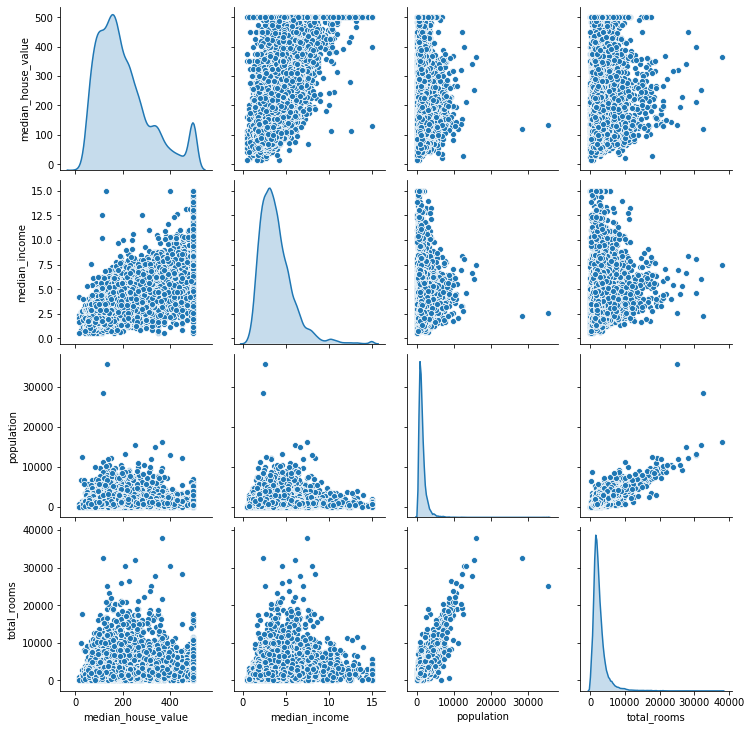

In [170]:
sns.pairplot(df[["median_house_value", "median_income", "population", "total_rooms"]], diag_kind="kde")

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 9615 to 10100
Data columns (total 7 columns):
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(7)
memory usage: 1.7 MB


In [0]:
FEATURES = ["median_income", "households", "population", "total_bedrooms", "total_rooms",				
                 "housing_median_age"]
LABEL = "median_house_value"	

ValueError: ignored